### UTN - FRBA - Teoría de Circuitos II - Alejandro Sobral



<img src="./1.PNG" align="center" width="50%" />
<img src="./2.PNG" align="center" width="50%" />
<img src="./3.PNG" align="center" width="50%" />







In [2]:
import math as m
from sympy import *
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from splane import pzmap, grpDelay, bodePlot, convert2SOS
from scipy.signal import TransferFunction

mpl.rcParams['figure.figsize'] = (10,10)

############################MAXIMA PLANICIDAD#################
alpha_min = 1    # dB
alpha_max = 18   # dB
w_p = 1
w_s = 3

epsilon_maximaplanicidad = m.sqrt(m.pow(10, 0.1 * alpha_min) - 1)
print(f'epsilon_maximaplanicidad={epsilon_maximaplanicidad}')

N_maximaplanicidad = m.log10((m.pow(10, alpha_max * 0.1) - 1) / (m.pow(10, alpha_min * 0.1) - 1)) / (2 * m.log10(w_s))
print(f'N_maximaplanicidad={N_maximaplanicidad}')


epsilon_maximaplanicidad=0.5088471399095875
N_maximaplanicidad=2.4940065748286493


In [4]:
############################Chevyshev#################
alpha_max = 1    # dB
alpha_min = 18     # dB
epsilon_chevy = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
N_chevy = m.acosh((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(10, alpha_max * 0.1) - 1)) / (2 * m.acosh(w_s))
print(f'epsilon_chevy={epsilon_chevy}')
print(f'N_chevy={N_chevy}')

epsilon_chevy=0.5088471399095875
N_chevy=1.7509701524232137


pol1=1/(1.03570164717667*S**4 + 1.03570164717667*S**2 + 1.25892541179417)
exp_pol1=1/(1.03570164717667*S**4 + 1.03570164717667*S**2 + 1.25892541179417)
denominador etapa 1: s^2+1.0977343285639294*s+1.102510328053848
denominador etapa 2: s^2+-1.097734328563928*s+1.1025103280538466
roots=[-0.54886716+0.89512857j -0.54886716-0.89512857j  0.54886716+0.89512857j
  0.54886716-0.89512857j]
filtro=TransferFunctionContinuous(
array([1.]),
array([1.        , 1.09773433, 1.10251033]),
dt: None
)
[-0.54886716+0.89512857j -0.54886716-0.89512857j  0.54886716+0.89512857j
  0.54886716-0.89512857j]


(2, <matplotlib.axes._subplots.AxesSubplot at 0x204b3495688>)

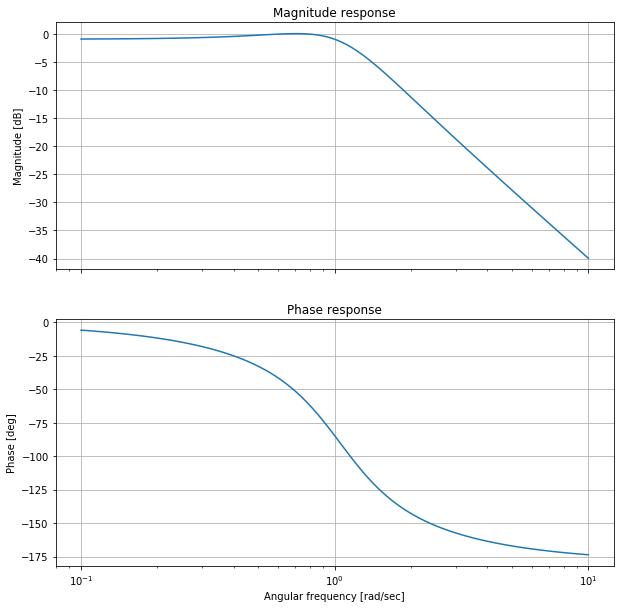

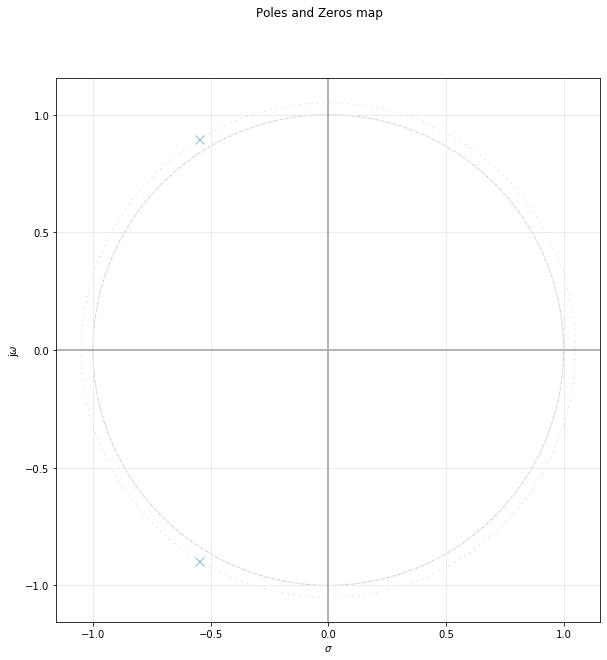

In [5]:

S = symbols('S')
pol1 = 1/(1+((epsilon_chevy**2)*(4*S**4 + 4*S**2 + 1)))
exp_pol1 = expand (pol1)
print(f'pol1={pol1}')
print(f'exp_pol1={exp_pol1}')


num2 = [1]
den2 = [1.03570164717667,0,1.03570164717667,0,1.25892541179417]
roots = np.roots(den2)


polos_etapa_1 = roots[0]  # T(S)
parte_real = polos_etapa_1.real
w0_polo = abs(polos_etapa_1)    
print(f'denominador etapa 1: s^2+{-2*parte_real}*s+{w0_polo ** 2}')

polos_etapa_1 = roots[2]  # Parte negativa T(-S)
parte_real = polos_etapa_1.real
w0_polo = abs(polos_etapa_1)
print(f'denominador etapa 2: s^2+{-2*parte_real}*s+{w0_polo ** 2}')

num = [1]
den = [1, 1.0977343285639294, 1.102510328053848]

print(f'roots={roots}')
filtro = TransferFunction(num, den)
print(f'filtro={filtro}')
bodePlot(filtro)
print(roots)
pzmap(filtro)

In [6]:
####################Calculo de componentes Normalizados#############



N_z = pow(10, 4) #Elijo trabajar con R = 10k
N_omega = 500
######################Primera etapa#######################################

R_1_n = 1
R_2_n = 1
R_3_n = 1.10251
R_5_n = 1
R_K_n = 1
R_Q_n = 0.91
C_1_n = 1
C_2_n = 1


R11 = R_1_n * N_z
R21 = R_2_n * N_z
R31 = R_3_n * N_z
R51 = R_5_n * N_z
R_Q_uno = R_Q_n * N_z
R_K_uno = R_K_n * N_z
C11 = C_1_n / N_z / N_omega
C21 = C_2_n / N_z / N_omega

Analizo la transferencia del circuito normalizado. Observo que los valores son aceptables, a su vez, no consigo (Estimo que por dedondeo) dar con 1 dB exacto. Lo considero aceptable.
Otro motivo que pudiera apoyar esta idea, es que la simulación en Python logra una exactitud mayor con polinomios similares, ya que puedo extraer la transferencia numérica en TINA y observo que son iguales, pero con menos decimales.

<img src="./4.PNG" align="center" width="75%" />
<img src="./4B.PNG" align="center" width="75%" />

Considerando entonces el circuito desnormalizado, encuentro una situación similar, considerada aceptable.

<img src="./5.PNG" align="center" width="75%" />
<img src="./6.PNG" align="center" width="75%" />
